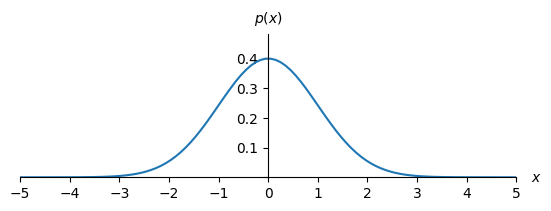

In [1]:
# Fig. 2.1 gauss1.py
%matplotlib inline

import numpy as np
import library.putil as putil
from numpy import exp,sqrt
import matplotlib.pyplot as plt

SAVE_FILE = ""

lim = 5
ratio = 6

def gauss1 (x):
    # sigma. mu is 0
    s = 1

    # (2.2)
    return 1 / (sqrt(2*np.pi) * s) * exp (- x*x / (2 * s * s))

def add_xy ():
    ax = plt.gca().axes
    ax.text(lim+0.3,0,r'$x$',va='center')
    ax.text(0,0.52,r'$p(x)$',ha='center')

def plot_gauss (N):
    xx = np.linspace (-lim, lim, N)
    yy = gauss1(xx)
    plt.plot (xx, yy)
    plt.xlim(-lim, lim)
    plt.ylim(0, 0.48)
    plt.xticks (np.arange(-lim,lim+1,1))
    plt.yticks (np.arange(0,0.5,0.1))
    putil.simpleaxis ()
    putil.zero_origin ()
    putil.aspect_ratio (ratio)
    putil.yticklabels (("","0.1","0.2","0.3","0.4"))
    add_xy ()

def main ():
    N = 100
    plot_gauss (N)
    if len(SAVE_FILE) > 0:
        plt.savefig(SAVE_FILE)
    plt.show ()

if __name__ == "__main__":
    main ()


[-1.45997663  0.15729633 -0.20449101 -1.16465624 -0.72265773  1.96243996
 -0.55765312  0.26788298 -1.17726769  1.14242332]


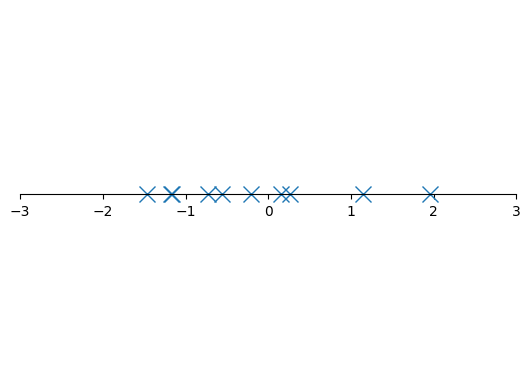

In [2]:
# Fig. 2.2 gauss1-sample.py
%matplotlib  inline

import numpy as np
import library.putil as putil
import matplotlib.pyplot as plt

SAVE_FILE = ""

N = 10

def myrandn (N=1):
    v = np.zeros(N)
    for n in range(N):
        r1 = np.random.random()
        r2 = np.random.random()
        v[n] = np.sqrt(-2 * np.log(r1)) * np.sin(2*np.pi*r2)
    return v

def main ():
    x = myrandn (N)
    print(x)
    plt.plot (x, np.zeros(N), 'x', markersize=12)
    plt.xlim(-3, 3)
    plt.ylim(-1, 1)
    putil.simpleaxis ()
    putil.zero_origin ()
    putil.one_dimensional ()
    
    if len(SAVE_FILE) > 0:
        plt.savefig (SAVE_FILE)
    plt.show ()

if __name__ == "__main__":
    main ()
    


[ 0.10651531 -0.98569784 -0.20704652 ...  2.29161846  2.07723584
 -0.75589318]


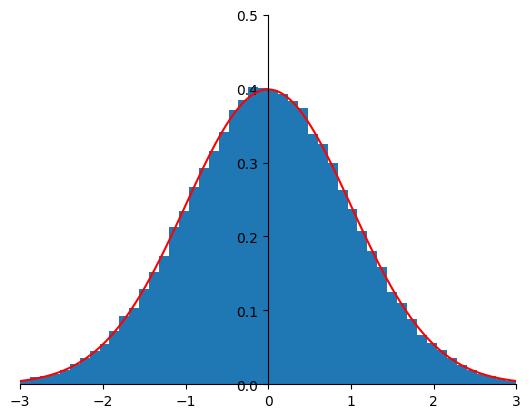

In [3]:
# similar to Fig. 2.2
%matplotlib  inline

import numpy as np
import library.putil as putil
import matplotlib.pyplot as plt

SAVE_FILE = ""

N = 100000
xLim = 3.0
binNum = 50

def gauss1 (x):
    # sigma. mu is 0
    s = 1

    # (2.2)
    return 1 / (sqrt(2*np.pi) * s) * exp (- x*x / (2 * s * s))

def plot_gauss (N):
    xx = np.linspace (-xLim, xLim, N)
    yy = gauss1(xx)
    plt.plot (xx, yy, color = "red")

def myrandn (N=1):
    v = np.zeros(N)
    for n in range(N):
        r1 = np.random.random()
        r2 = np.random.random()
        v[n] = np.sqrt(-2 * np.log(r1)) * np.sin(2*np.pi*r2)
    return v

def main ():
    x = myrandn (N)
    print(x)
    #plt.plot (x, np.zeros(N), 'x', markersize=12)
    plt.hist(x, bins=binNum, range=[-xLim, xLim], density=True)
    plt.xlim(-xLim, xLim)
    plt.ylim(0, 0.5)
    putil.simpleaxis ()
    putil.zero_origin ()
    #putil.one_dimensional ()
    
    Ntmp = 100
    plot_gauss (Ntmp)

    if len(SAVE_FILE) > 0:
        plt.savefig (SAVE_FILE)
    plt.show ()

if __name__ == "__main__":
    main ()

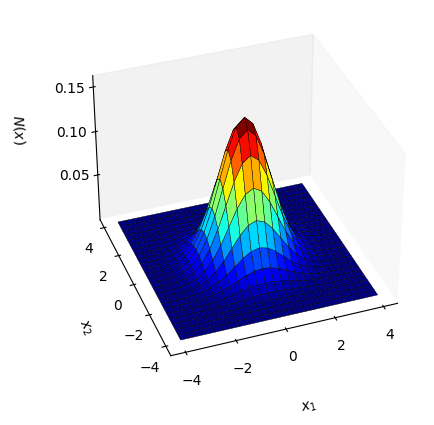

In [4]:
# Fig. 2.4 gauss2.py
%matplotlib  inline

#import sys
import library.putil as putil
import numpy as np
import matplotlib.pyplot as plt

SAVE_FILE = ""

[xmin,xmax] = [-4,4]

def gauss2 (x):
    return np.exp (lgauss2(x))

def lgauss2 (x):
    D = len(x)
    return - x.dot(x) / 2 - np.log (2 * np.pi) * D / 2

def plot_gauss2 (N=25):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    xx = np.linspace (xmin, xmax, N)
    X,Y = np.meshgrid (xx,xx)
    Z = np.array ([gauss2(np.array([x,y])) for x in xx for y in xx]).reshape (N,N)

    # plot
    ax.tick_params (axis='x',pad=2)
    ax.tick_params (axis='y',pad=2)
    z_ticks = np.arange(0, 0.16, 0.05) 
    ax.set_zticks (z_ticks)
    ax.set_xlabel (r'$x_1$',labelpad=16)
    ax.set_ylabel (r'$x_2$',labelpad=10)
    ax.set_zlabel (r'$N(x)$',labelpad=17)
    ax.w_zaxis.set_pane_color ((1,1,1,1))
    ax.plot_surface (X,Y,Z,cmap='jet',shade=True,
                     linewidth=0.3,edgecolor='black')
    ax.view_init(elev=35, azim=-110)
    ax.grid(visible = False)

def main ():
    plot_gauss2 ()
    if len(SAVE_FILE) > 0:
        putil.savefig (SAVE_FILE)
    plt.show ()
    
if __name__ == "__main__":
    main ()


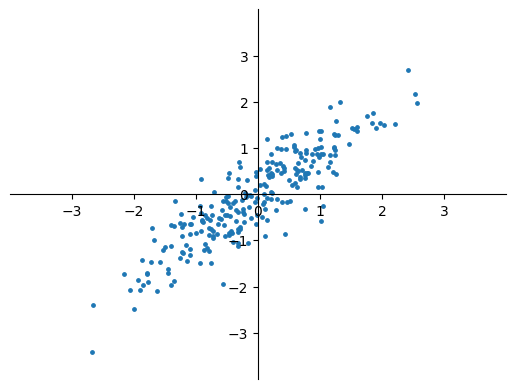

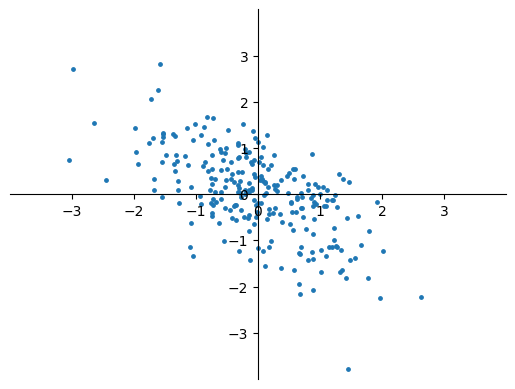

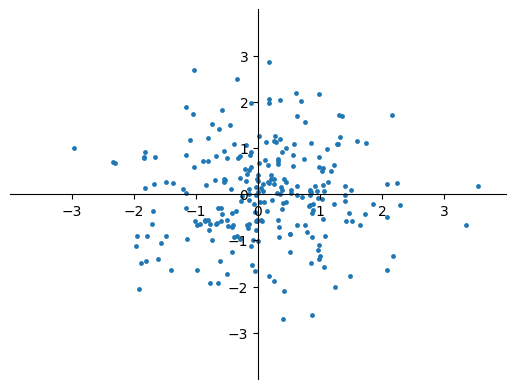

In [5]:
# Fig. 2.5 gauss2-gen.py
%matplotlib inline

import library.putil as putil
import numpy as np
from numpy.random import randn
from numpy.linalg import cholesky as chol
import matplotlib.pyplot as plot

N = 250
SAVE_FILE = ""
lim = 4.0

def gauss2 (L):
    return np.dot (L, randn(2))

def main ():

    Ss = [np.array([[1,0.9],[0.9,1]]), np.array([[1,-0.7],[-0.7,1]]), np.array([[1,0],[0,1]])]
    
    for S in Ss:
        # (2.33)
        L = chol (S)
        X = np.array ([gauss2(L) for n in range(N)])

        fig = plt.figure()
        ax = fig.add_subplot()
        plt.scatter (X.T[0], X.T[1], s = 6)
        
        ax.set_xlim(-lim, lim)
        ax.set_ylim(-lim, lim)
        ax.set_xticks(np.arange(-3,4,1))
        ax.set_yticks(np.arange(-3,4,1))
        putil.simpleaxis ()
        putil.zero_origin ()

    if len(SAVE_FILE) > 0:
        putil.savefig (SAVE_FILE)
    plt.show ()

if __name__ == "__main__":
    main ()
